In [ ]:
### First Practical 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import tree


In [2]:
df = pd.read_csv("prac_1.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
def impute_median(series):
    return series.fillna(series.median())

In [10]:
df['Age'] = df['Age'].transform(impute_median)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Cabin'].fillna(str(df['Cabin'].mode().values[0]),inplace=True)

In [13]:
df['Embarked'].fillna(str(df['Embarked'].mode().values[0]),inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
df.drop(['Parch'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x21db37dd0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21db37dd640>,
 'boxes': [<matplotlib.lines.Line2D at 0x21db3120d90>],
 'medians': [<matplotlib.lines.Line2D at 0x21db37ddbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21db37ddeb0>],
 'means': []}

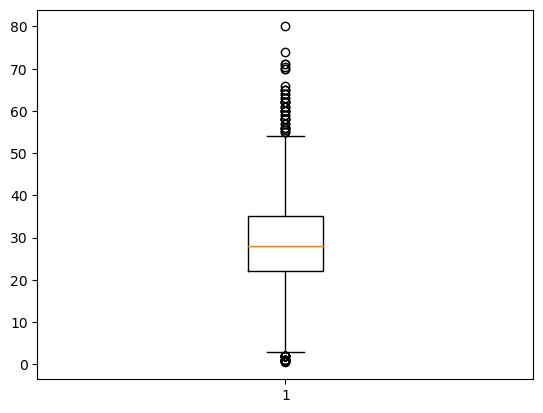

In [18]:
plt.boxplot(df['Age'])

In [19]:
Y = df['Age']
X = df['Sex']

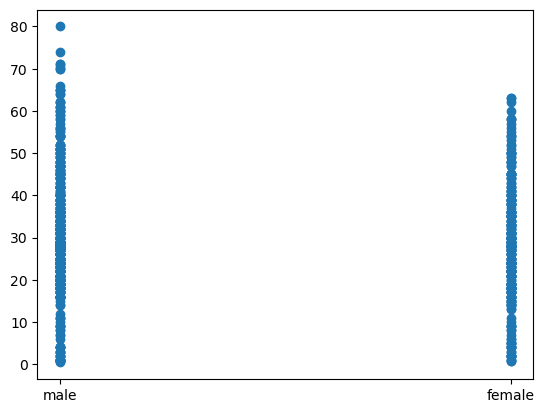

In [20]:
plt.scatter(X,Y)

<BarContainer object of 891 artists>

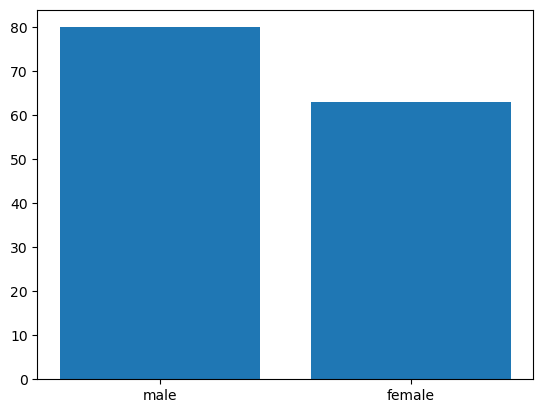

In [22]:
plt.bar(df['Sex'],df['Age'])

<AxesSubplot:>

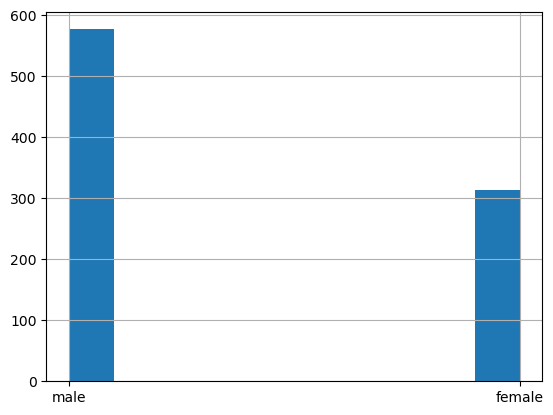

In [23]:
df['Sex'].hist()

<AxesSubplot:>

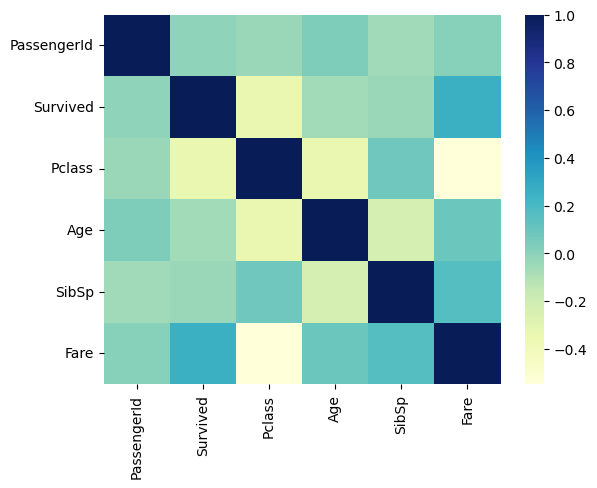

In [28]:
sns.heatmap(df.corr(),cmap='YlGnBu')

In [ ]:
####Second Practical

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
df1 = pd.read_csv('driver.csv')

In [34]:
df1.head()

,User ID,Gender,Score1,Score2,Category
0,15624510,Male,84,83,1
1,15810944,Male,76,77,1
2,15668575,Female,83,84,1
3,15603246,Female,77,76,1
4,15804002,Male,82,81,1


In [35]:
df1.dtypes

User ID      int64
Gender      object
Score1       int64
Score2       int64
Category     int64
dtype: object

In [36]:
df.shape

(891, 11)

In [37]:
X = df1.iloc[:,[2,3]].values

In [38]:
X

array([[84, 83],
       [76, 77],
       [83, 84],
       [77, 76],
       [82, 81],
       [78, 79],
       [81, 82],
       [79, 78],
       [85, 84],
       [75, 74],
       [61, 62],
       [59, 58],
       [62, 61],
       [58, 59],
       [63, 64],
       [57, 56],
       [64, 63],
       [56, 57],
       [65, 64],
       [55, 54],
       [43, 44],
       [37, 36],
       [44, 43],
       [36, 37],
       [45, 44],
       [35, 34],
       [41, 42],
       [39, 38],
       [42, 41],
       [38, 39]], dtype=int64)

In [39]:
df1.isnull().sum()

User ID     0
Gender      0
Score1      0
Score2      0
Category    0
dtype: int64

In [40]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

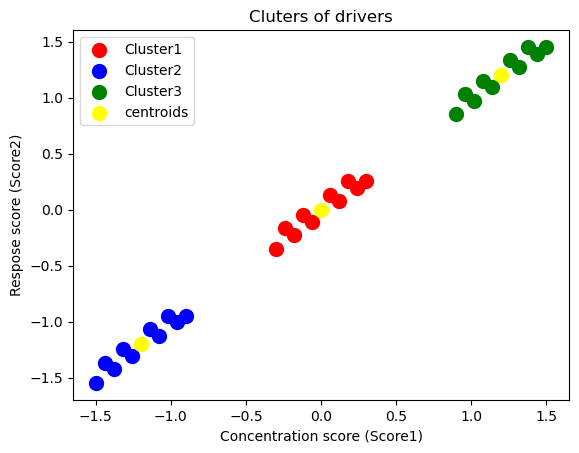

In [42]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'centroids')
plt.title('Cluters of drivers')
plt.xlabel('Concentration score (Score1)')
plt.ylabel('Respose score (Score2)')
plt.legend()
plt.show()

In [ ]:
##### Practical 3

In [43]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=c3df56e4527720d3e72645e210f874a26c545d5db20d9cdafccc640da77851ec
  Stored in directory: c:\users\abhay\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
from apyori import apriori

In [46]:
with open('CanteenDataSet.csv') as f:
    data = f.read()
    data = data.split("\n")

In [47]:
data

['"Tea, Samosa, Sandwich"',
 '"Samosa, Tea, Sandwich, Noodles"',
 '"Samosa, Cold Coffee, French Fries"',
 '"Pizza, Maggie,Samosa,Tea"',
 '"Maggie,Cold Coffee,Sandwich"',
 '"Samosa,Cold Coffee,French Fries"',
 '"Maggie,Cold Coffee,Noodles"',
 '"Maggie,Samosa,Cold Coffee,Sandwich"',
 '"Pizza,Maggie,Samosa,Cold Coffee"',
 '"Samosa,Tea"',
 '"Black Tea,Manchurian,Sandwich,Noodles"',
 '"Black Tea,Manchurian,Sandwich,Noodles"',
 '"Black Tea,Fried Maggie,French Fries"',
 '"Samosa,Black Tea,Manchurian"',
 '"Samosa,Fried Maggie,Sandwich"',
 '"Black Tea,Fried Maggie,Sandwich"',
 '"Samosa,Fried Maggie,French Fries"',
 '"Samosa,Black Tea,Fried Maggie"',
 '"Samosa,Black Tea,Fried Maggie"',
 '"Cold Coffee,Tea,Black Tea,Noodles"']

In [48]:
newData =[]
for line in data:
    newData.append(line.split(","))

In [49]:
newData

[['"Tea', ' Samosa', ' Sandwich"'],
 ['"Samosa', ' Tea', ' Sandwich', ' Noodles"'],
 ['"Samosa', ' Cold Coffee', ' French Fries"'],
 ['"Pizza', ' Maggie', 'Samosa', 'Tea"'],
 ['"Maggie', 'Cold Coffee', 'Sandwich"'],
 ['"Samosa', 'Cold Coffee', 'French Fries"'],
 ['"Maggie', 'Cold Coffee', 'Noodles"'],
 ['"Maggie', 'Samosa', 'Cold Coffee', 'Sandwich"'],
 ['"Pizza', 'Maggie', 'Samosa', 'Cold Coffee"'],
 ['"Samosa', 'Tea"'],
 ['"Black Tea', 'Manchurian', 'Sandwich', 'Noodles"'],
 ['"Black Tea', 'Manchurian', 'Sandwich', 'Noodles"'],
 ['"Black Tea', 'Fried Maggie', 'French Fries"'],
 ['"Samosa', 'Black Tea', 'Manchurian"'],
 ['"Samosa', 'Fried Maggie', 'Sandwich"'],
 ['"Black Tea', 'Fried Maggie', 'Sandwich"'],
 ['"Samosa', 'Fried Maggie', 'French Fries"'],
 ['"Samosa', 'Black Tea', 'Fried Maggie"'],
 ['"Samosa', 'Black Tea', 'Fried Maggie"'],
 ['"Cold Coffee', 'Tea', 'Black Tea', 'Noodles"']]

In [50]:
newData[0][0][1]

'T'

In [53]:
for i in range(len(newData)):
    for j in range(len(newData[i])):
        newData[i][j] = newData[i][j].replace('"','')
        
print(newData)

[['Tea', ' Samosa', ' Sandwich'], ['Samosa', ' Tea', ' Sandwich', ' Noodles'], ['Samosa', ' Cold Coffee', ' French Fries'], ['Pizza', ' Maggie', 'Samosa', 'Tea'], ['Maggie', 'Cold Coffee', 'Sandwich'], ['Samosa', 'Cold Coffee', 'French Fries'], ['Maggie', 'Cold Coffee', 'Noodles'], ['Maggie', 'Samosa', 'Cold Coffee', 'Sandwich'], ['Pizza', 'Maggie', 'Samosa', 'Cold Coffee'], ['Samosa', 'Tea'], ['Black Tea', 'Manchurian', 'Sandwich', 'Noodles'], ['Black Tea', 'Manchurian', 'Sandwich', 'Noodles'], ['Black Tea', 'Fried Maggie', 'French Fries'], ['Samosa', 'Black Tea', 'Manchurian'], ['Samosa', 'Fried Maggie', 'Sandwich'], ['Black Tea', 'Fried Maggie', 'Sandwich'], ['Samosa', 'Fried Maggie', 'French Fries'], ['Samosa', 'Black Tea', 'Fried Maggie'], ['Samosa', 'Black Tea', 'Fried Maggie'], ['Cold Coffee', 'Tea', 'Black Tea', 'Noodles']]


In [54]:
association_rules = apriori(newData,min_support=0.0045,min_confidence=0.2,min_lift=3,min_lenght=2)
AR = list(association_rules)

In [58]:
b = AR[0][0]
for item in AR:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: "+ str(item[2][0][3]))
    print("================================")

Rule:  French Fries ->  Cold Coffee
Support: 0.05
Confidence: 1.0
Lift: 20.0
Rule:  Maggie -> Pizza
Support: 0.05
Confidence: 1.0
Lift: 10.0
Rule:  Maggie -> Tea
Support: 0.05
Confidence: 1.0
Lift: 5.0
Rule:  Noodles ->  Sandwich
Support: 0.05
Confidence: 1.0
Lift: 10.0
Rule:  Noodles ->  Tea
Support: 0.05
Confidence: 1.0
Lift: 20.0
Rule:  Sandwich ->  Samosa
Support: 0.05
Confidence: 1.0
Lift: 10.0
Rule:  Samosa -> Tea
Support: 0.05
Confidence: 1.0
Lift: 5.0
Rule:  Sandwich ->  Tea
Support: 0.05
Confidence: 0.5
Lift: 10.0
Rule: Cold Coffee -> Maggie
Support: 0.2
Confidence: 0.6666666666666667
Lift: 3.3333333333333335
Rule: Manchurian -> Noodles
Support: 0.1
Confidence: 0.6666666666666667
Lift: 3.3333333333333335
Rule:  French Fries -> Samosa
Support: 0.05
Confidence: 1.0
Lift: 20.0
Rule:  Maggie -> Samosa
Support: 0.05
Confidence: 1.0
Lift: 10.0
Rule:  Maggie -> Tea
Support: 0.05
Confidence: 1.0
Lift: 20.0
Rule:  Maggie -> Samosa
Support: 0.05
Confidence: 1.0
Lift: 10.0
Rule:  Noodles

In [ ]:
with